# More Titanic? More Titanic.

![titanic picture from wikipedia](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/600px-RMS_Titanic_3.jpg)

In [54]:
# first, need our imports and to grab the data
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
df = pd.read_csv('data/titanic.csv')

In [40]:
# Let's look and remember what's in the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### What are the most common last names?

Wait, the last names are part of the full name column... first we'll need to grab the last names!

A few ways we can do this:

In [41]:
names = df['Name'].str.split(", ")

In [42]:
names

0                              [Braund, Mr. Owen Harris]
1      [Cumings, Mrs. John Bradley (Florence Briggs T...
2                               [Heikkinen, Miss. Laina]
3         [Futrelle, Mrs. Jacques Heath (Lily May Peel)]
4                             [Allen, Mr. William Henry]
                             ...                        
886                              [Montvila, Rev. Juozas]
887                       [Graham, Miss. Margaret Edith]
888           [Johnston, Miss. Catherine Helen "Carrie"]
889                              [Behr, Mr. Karl Howell]
890                                [Dooley, Mr. Patrick]
Name: Name, Length: 891, dtype: object

In [43]:
names[0]

['Braund', 'Mr. Owen Harris']

In [44]:
names[0][0]

'Braund'

In [45]:
df['Name'].str.split(", ").map(lambda x: x[0])

0         Braund
1        Cumings
2      Heikkinen
3       Futrelle
4          Allen
         ...    
886     Montvila
887       Graham
888     Johnston
889         Behr
890       Dooley
Name: Name, Length: 891, dtype: object

In [46]:
# Need to grab last names ... but how?
df['Last Name'] = pd.Series(name[0] for name in df['Name'].str.split(", "))

In [47]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last Name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen


In [49]:
most_common_ln = df['Last Name'].value_counts().head(8)
most_common_ln

Andersson    9
Sage         7
Johnson      6
Carter       6
Goodwin      6
Skoog        6
Panula       6
Rice         5
Name: Last Name, dtype: int64

`groupby` or `value_counts`?

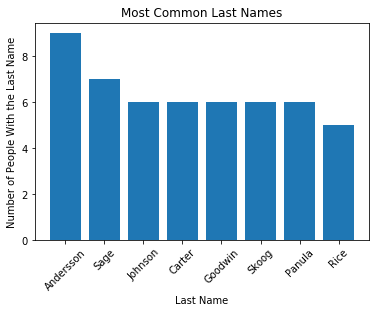

In [60]:
plt.bar(most_common_ln.index, most_common_ln)
plt.title('Most Common Last Names')
plt.ylabel('Number of People With the Last Name')
plt.xlabel('Last Name')
plt.xticks(rotation=45)
plt.show()

### Who Paid the Most Fare?

As always - a few ways we can do this: `.loc` versus `sort_values`

In [65]:
df.loc[df['Fare'] == df['Fare'].max()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [70]:
df.sort_values(by='Fare', ascending= False).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S


And let's visualize some more!

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

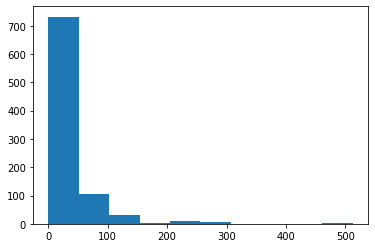

In [71]:
# Plot a histogram - but now, let's do all fares
plt.hist(df['Fare'])

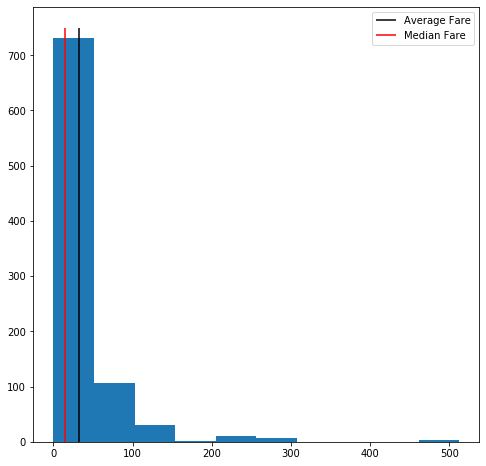

In [77]:
# Okay that's pretty bland, let's see if we can add more detail
plt.figure(figsize=(8,8))
plt.hist(df['Fare'])
plt.vlines(df['Fare'].mean(),0, 750, label = 'Average Fare')
plt.vlines(df['Fare'].median(),0, 750, label = 'Median Fare', color = "red")
plt.legend()
plt.show()

In [82]:
df['Age'].max()

80.0

C:\Users\cxu19\anaconda\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\cxu19\anaconda\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


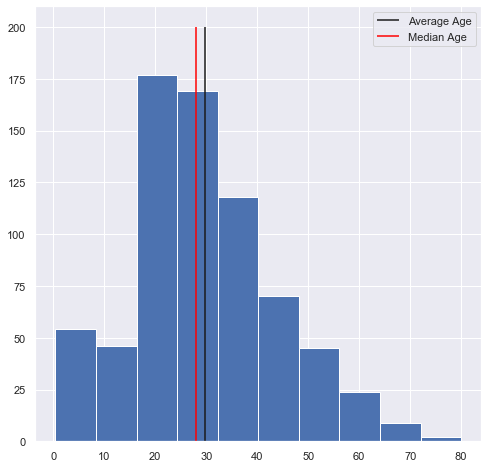

In [85]:
plt.figure(figsize=(8,8))
plt.hist(df['Age'])
plt.vlines(df['Age'].mean(),0, 200, label = 'Average Age')
plt.vlines(df['Age'].median(),0, 200, label = 'Median Age', color = "red")
plt.legend()
plt.show()

## Seaborn 

![Sam Seaborn from West Wing, image from the TV guide](https://tvguide1.cbsistatic.com/i/2017/01/07/0f1a6ab5-8c63-4869-9f85-5d8b2b14913b/cf2e9396152ee85468e5bcfe063053a4/010717-west-wing-rob-lowe-news.jpg)

[Seaborn, I choose you!](https://elitedatascience.com/python-seaborn-tutorial) (aka an excellent exploration of the functionality of Seaborn)

Now let's practice with Seaborn:

In [84]:
import seaborn as sns
sns.set(style='darkgrid')
# Same as sns.set_style('darkgrid')

In [93]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

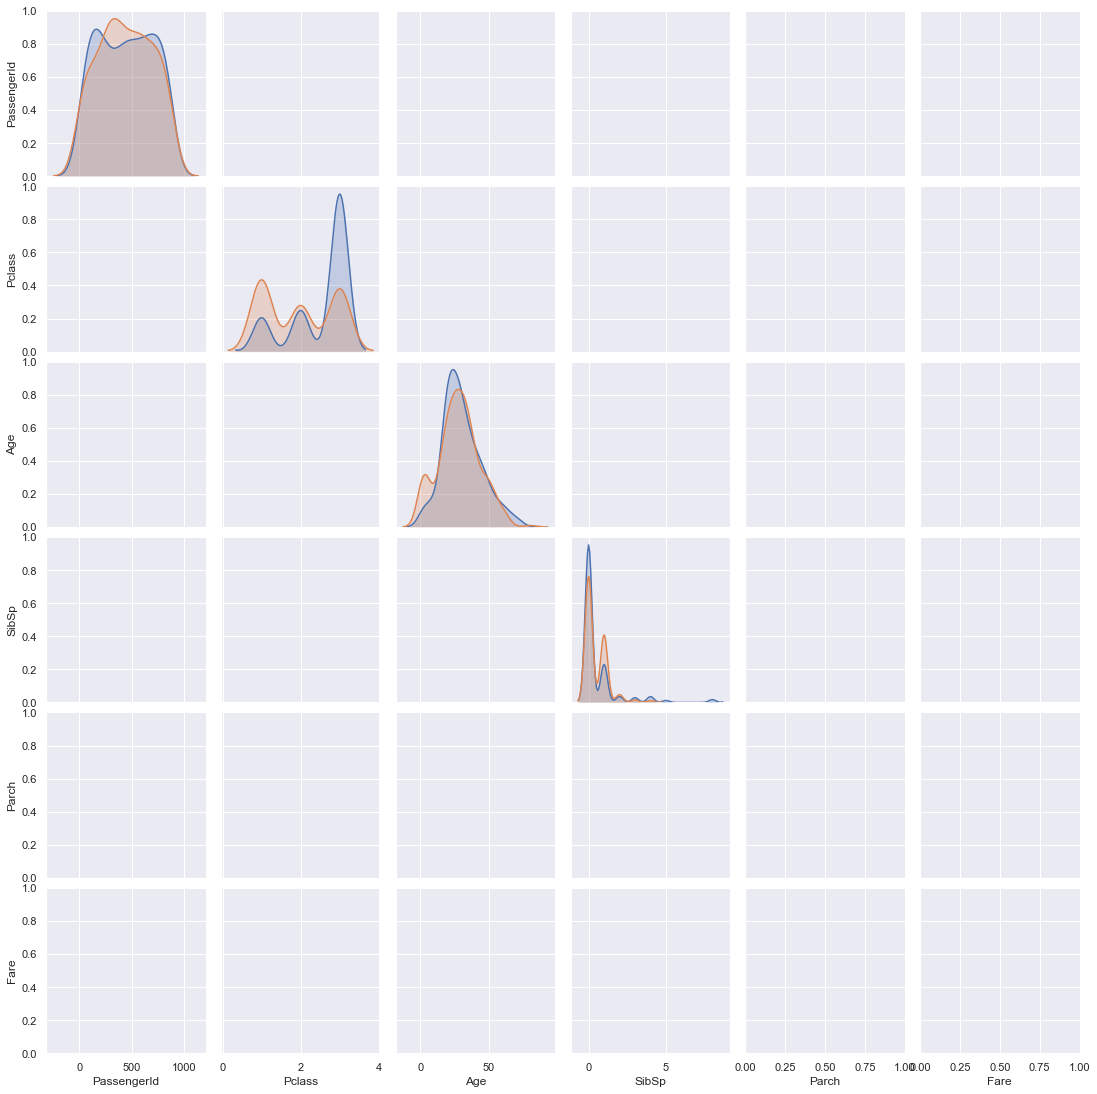

In [92]:
# We've mentioned pairplots, let's take a look...
sns.pairplot(df, hue='Survived')

In [97]:
sns_version_

NameError: name 'sns_version_' is not defined

In [ ]:
# Try out a swarm plot with class and age


In [ ]:
# Let's try a categorical plot (used to be a factor plot)
# Do the same swarmplot, but now make columns of survived
